In [1]:
from utils.data import Data
from utils.estimators import Dataset, Classifier
%matplotlib inline

In [2]:
tiff_filename = "./HKH/Images/LE07_140041_20071221.tif"
shp_filename = "./HKH/Labels/HKH_CIDC_5basins_all.shp"

data = Data(tiff_filename, shp_filename, classes = ['Debris covered', 'Clean Ice', 'Background'])
tiff = data.read_tiff()
mask = data.get_mask(column="Glaciers")

/home/mibook/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


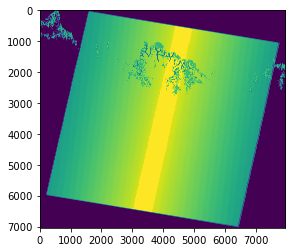

In [3]:
#data.view_tiff(tiff, channel=1)
data.view_mask(mask)

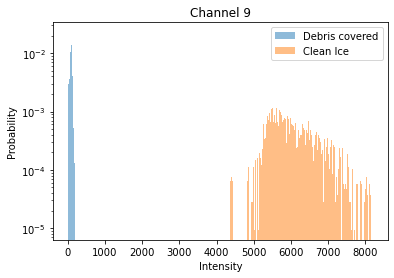

In [4]:
X,y = data.get_Xy(tiff, mask, n_sample = 2000000, save=False)
X_train, X_test, y_train, y_test = data.train_test_split(X, y, save=False)
data.get_histogram(X_train, y_train, channel = 9)

In [5]:
classifier = Classifier(savepath = "./outputs",
                        bands = ["0","1","2","3","4","5","6","7","8","9","ndvi","ndsi","ndwi","elevation","slope"])

In [6]:
all_dataset = Dataset(X_train, X_test, y_train, y_test, classes = ['Debris covered', 'Clean Ice', 'Background'])

In [7]:
all_dataset.info()

No. of classes: 3
Class labels: ['Debris covered', 'Clean Ice', 'Background']
Total data samples: 425532
Train samples: 319149
	 0:Debris covered = 106484
	 1:Clean Ice = 106500
	 2:Background = 106165
Test stats: 106383
	 0:Debris covered = 35360
	 1:Clean Ice = 35344
	 2:Background = 35679



Random Forest
Elapsed_time training  1.815419 
Accuracy on train Set: 
1.0
Accuracy on Test Set: 
1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35360
           1       1.00      1.00      1.00     35344
           2       1.00      1.00      1.00     35679

    accuracy                           1.00    106383
   macro avg       1.00      1.00      1.00    106383
weighted avg       1.00      1.00      1.00    106383

Confusion Matrix: 
[[35360     0     0]
 [    0 35344     0]
 [    0     0 35679]]


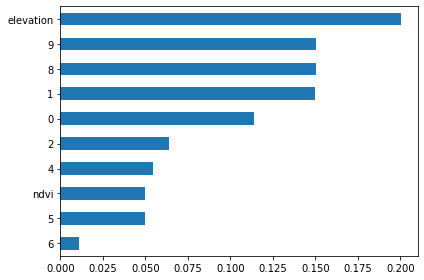

In [8]:
classifier.random_forest(trainX=all_dataset.trainX, trainY=all_dataset.trainY, 
                         testX=all_dataset.testX, testY=all_dataset.testY, 
                         grid_search=False, train=True, 
                         n_estimators = 10, max_depth=10, 
                         feature_importance=True)

In [ ]:
prediction = classifier.get_labels(tiff,"/estimator.sav")

In [ ]:
data.view_mask(prediction)